## Tavoite ja rintasyövän diagnoosin ennustamisen tärkeys

### Tavoite
Tämän projektin ensisijaisena tavoitteena on kehittää koneoppimismalli, joka käyttää k-lähimmän naapurin (kNN) algoritmia ennustamaan, onko rintasyöpädiagnoosi pahanlaatuinen vai hyvänlaatuinen. Tämä sisältää mallin kouluttamisen rintasyöpätapauksista koostuvalla tietojoukolla ja sen suorituskyvyn arvioinnin uusien tapausten luokittelussa.

### Tärkeys
Syövän diagnoosin tarkka ennustaminen on tärkeää useista syistä:

1. **Varhainen havaitseminen**: Syövän varhainen ja tarkka diagnoosi voi merkittävästi parantaa onnistuneen hoidon ja selviytymisen mahdollisuuksia. Se mahdollistaa oikea-aikaisen puuttumisen ja asianmukaisen hoitosuunnitelman.

2. **Potilaiden tulokset**: Tarkat ennusteet auttavat vähentämään väärien positiivisten ja väärien negatiivisten määrää, mikä minimoi tarpeettomat hoidot ja varmistaa, että potilaat saavat oikean diagnoosin ja hoidon.

3. **Resurssien kohdentaminen**: Tehokkaat ja tarkat diagnostiikkatyökalut voivat auttaa terveydenhuollon tarjoajia kohdentamaan resursseja tehokkaammin, varmistaen, että kiireellistä hoitoa tarvitsevat potilaat saavat sen nopeasti.

4. **Tutkimus ja kehitys**: Koneoppimismallit voivat paljastaa lääketieteellisestä datasta kuvioita ja oivalluksia, jotka eivät ole ilmeisiä perinteisen analyysin avulla, edistäen lääketieteellisen tutkimuksen ja uusien diagnostiikkatekniikoiden kehitystä.

Hyödyntämällä koneoppimisalgoritmeja, kuten kNN, pyrimme parantamaan rintasyövän diagnoosin tarkkuutta ja luotettavuutta, mikä lopulta parantaa potilaiden hoitoa ja tuloksia.

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
## breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
## X = breast_cancer_wisconsin_diagnostic.data.features
## y = breast_cancer_wisconsin_diagnostic.data.targets

## df = pd.concat([X, y], axis=1)

df = pd.read_csv('knn_cancer_wisconsin.csv')

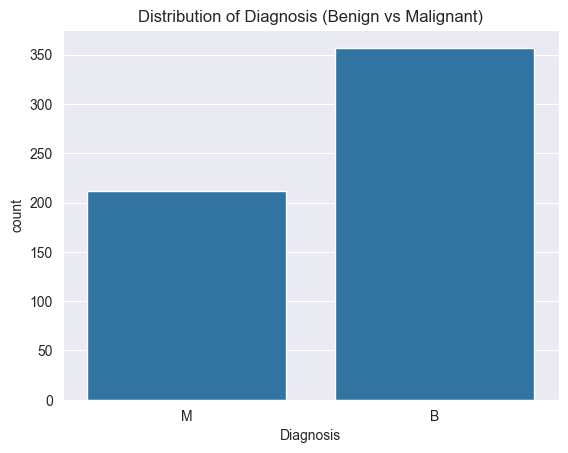

In [2]:
sns.countplot(data=df, x='Diagnosis')
plt.title("Distribution of Diagnosis (Benign vs Malignant)")
plt.show()

In [3]:

df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Additional Variable Information

1. **ID Number**: Unique identifier for each patient.
2. **Diagnosis**: Diagnosis of breast cancer:
   - **M** = Malignant (cancerous).
   - **B** = Benign (non-cancerous).
3. **Features (3-32)**:
   For each cell nucleus, **10 real-valued features** are computed based on the following metrics:

   - **a. Radius**: Mean of distances from the center to points on the perimeter.
   - **b. Texture**: Standard deviation of gray-scale values.
   - **c. Perimeter**: Length of the tumor's boundary.
   - **d. Area**: Size of the tumor.
   - **e. Smoothness**: Local variation in radius lengths.
   - **f. Compactness**: Calculated as \( \text{(Perimeter}^2 / \text{Area)} - 1.0 \).
   - **g. Concavity**: Severity of concave portions of the tumor contour.
   - **h. Concave Points**: Number of concave portions of the tumor contour.
   - **i. Symmetry**: Symmetry of the tumor shape.
   - **j. Fractal Dimension**: Measurement of "coastline approximation" - 1.


In [4]:

df.loc[:]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [5]:

# Define feature and target columns
feature_columns = [
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", 
    "compactness1", "concavity1", "concave_points1"
]
target_column = "Diagnosis"

# Separate features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

In [6]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.loc[:]

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,M
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,M
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,M
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,M


In [7]:

X_scaled = scaler.fit_transform(X)


In [8]:

# Split the data using hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


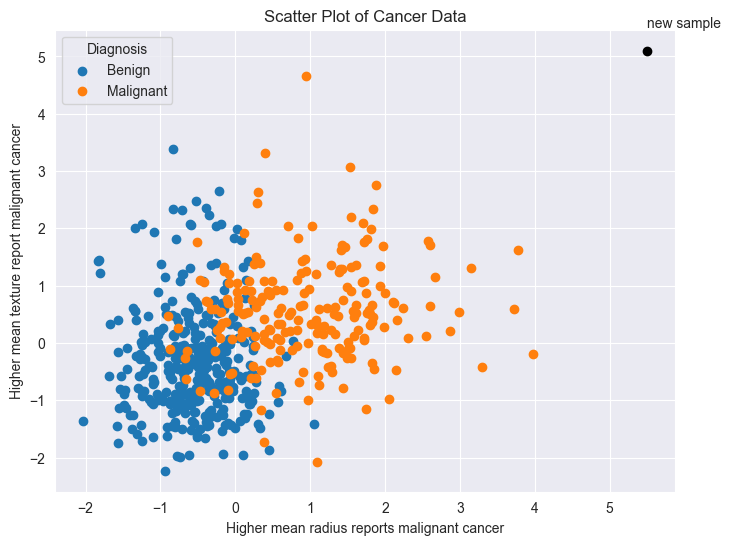

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

for diagnosis, group in df.groupby('Diagnosis'):
    ax.scatter(group['radius1'], group['texture1'], label='Benign' if diagnosis == 'B' else 'Malignant')

# Add a hypothetical new sample
ax.plot([5.5], [5.1], 'o', c='black')  
ax.text(5.5, 5.5, 'new sample')  

# Legend and labels
ax.legend(title='Diagnosis')
ax.set(xlabel='Higher mean radius reports malignant cancer', ylabel='Higher mean texture report malignant cancer', 
       title='Scatter Plot of Cancer Data')

plt.show()

**Mean Radius (Solun keskimääräinen säde)**  
*Mitä se mittaa:* Keskimääräinen etäisyys solun ytimen keskeltä sen rajaan.  
*Miksi se on tärkeä:* Pahanlaatuiset kasvaimet koostuvat usein suuremmista ja epäsäännöllisemmän muotoisista soluista, joiden rajat ulottuvat kauemmas ytimestä. Tämä johtaa korkeampaan keskimääräiseen säteeseen.

**Mean Texture (Solun keskimääräinen tekstuuri)**  
*Mitä se mittaa:* Pikselien kirkkausarvojen keskihajonta solukuvassa.  
*Miksi se on tärkeä:* Pahanlaatuisissa kasvaimissa on yleensä enemmän vaihtelua solujen rakenteessa, mikä näkyy suurempana kirkkausarvojen vaihteluna eli korkeampana tekstuurilukuna.

k=1, Test Set Accuracy: 94.74%
k=3, Test Set Accuracy: 95.61%
k=5, Test Set Accuracy: 93.86%
k=7, Test Set Accuracy: 94.74%
k=9, Test Set Accuracy: 95.61%


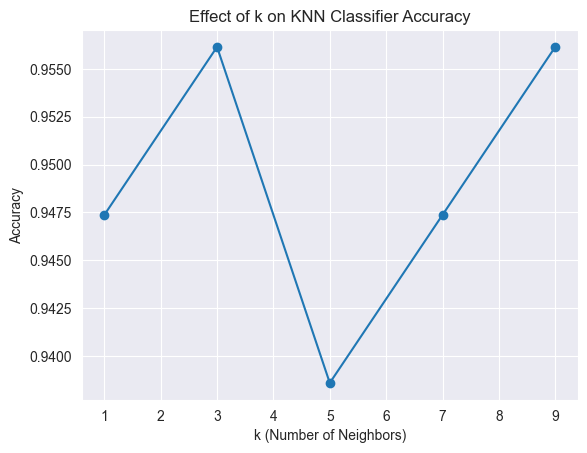

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Experiment with different values of k
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)
    print(f"k={k}, Test Set Accuracy: {acc * 100:.2f}%")

# Plot k vs accuracy
plt.plot(k_values, accuracies, marker='o')
plt.title("Effect of k on KNN Classifier Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Predict on the test set
y_pred = knn.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["B", "M"])

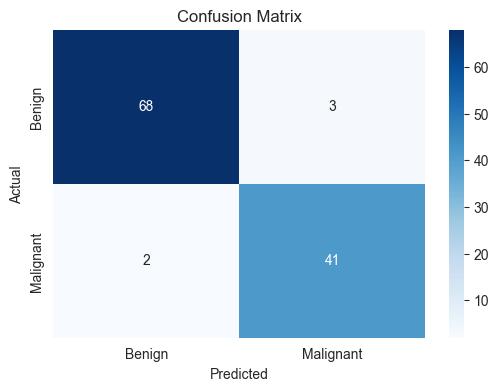

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Vasemmassa yläkulmassa ovat True Negatives (TN): Nämä ovat hyvänlaatuisia tapauksia, jotka on ennustettu oikein hyvänlaatuisiksi.

Oikeassa yläkulmassa ovat False Positives (FP): Nämä ovat hyvänlaatuisia tapauksia, jotka on ennustettu virheellisesti pahanlaatuisiksi.

Vasemmassa alakulmassa ovat False Negatives (FN): Nämä ovat pahanlaatuisia tapauksia, jotka on ennustettu virheellisesti hyvänlaatuisiksi.

Oikeassa alakulmassa ovat True Positives (TP): Nämä ovat pahanlaatuisia tapauksia, jotka on ennustettu oikein pahanlaatuisiksi.

Matriisisi arvot:

True Negatives (TN): 68
False Positives (FP): 3
False Negatives (FN): 2
True Positives (TP): 41

Hyvänlaatuiset tapaukset (Todelliset negatiiviset):

Hyvänlaatuisten tapausten kokonaismäärä:

68 + 3 = 71


71:stä todellisesta hyvänlaatuisesta tapauksesta:

68 ennustettiin oikein hyvänlaatuisiksi (True Negatives / Todelliset negatiiviset).

3 ennustettiin virheellisesti pahanlaatuisiksi (False Positives / Väärät positiiviset).

Pahanlaatuiset tapaukset (Todelliset positiiviset):

Pahanlaatuisten tapausten kokonaismäärä:
41 + 2 = 43

43:sta todellisesta pahanlaatuisesta tapauksesta:

41 ennustettiin oikein pahanlaatuisiksi (True Positives / Todelliset positiiviset).

2 ennustettiin virheellisesti hyvänlaatuisiksi (False Negatives / Väärät negatiiviset).

Yhteenveto:

Hyvänlaatuisissa tapauksissa luokitin sai 68 oikein ja teki 3 virhettä.
Pahanlaatuisissa tapauksissa luokitin sai 41 oikein ja teki 2 virhettä.

Julkaisu

Mallin käyttö:

Malli voitaisiin integroida päätöksentekojärjestelmään auttamaan terveydenhuolllon ammattilaisia rintasyövän diagnosoinnissa ja sen ennustamisessa. Mallille voi syöttää lisää tuloksia, mikä mitä todennäköisimmin parantaa sen ennustuksien tarkkuutta.

Tulosten viestintä:

Tulokset voitaisiin näyttää käyttäjäystävällisestä käyttöliittymästä. Se voisi näyttää tuloksista mittareita, ja halutut kaaviot. Järjestelmästä pystyisi myös ajamaan raportteja.

Jatkuva kehitys:

Mallin suorituskykyä voitaisiin seurata jatkuvasti ja sitä voitaisiin päivittää uusilla tiedoilla tarkkuuden parantamiseksi. Säännöllisiä arviointeja voitaisiin suorittaa varmistaakseen, että malli pysyy luotettavana ja tehokkaana eri kliinisissä ympäristöissä

